<a href="https://colab.research.google.com/github/PyCraftMusadaq/TensorFlowCodes/blob/main/01__Pytorch_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn ## it contains Pytorch's Building Blocks
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data(preparing and loading)

In [2]:
# create known  parameters
weight = 0.7
bias = 0.3

# create numbers
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
X

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [3]:
y = weight* X + bias
y = y.squeeze()

## Splitting our data into train,test part

In [4]:
train_split = int(0.8*len(X))
train_split

40

In [5]:
test_split = int(0.2*len(X))
test_split

10

In [6]:
X_train = X[:train_split]
y_train = y[:train_split]
X_test = X[train_split:]
y_test = y[train_split:]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

torch.Size([40, 1])
torch.Size([40])
torch.Size([10, 1])
torch.Size([10])


In [7]:
len(X_train), len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [8]:
# Lets create functions
def plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y,predictions=None):
  """
  Plot Train,test and compare predictoins thorough visualizations
  """
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="r",s=4,label="traning data")
  plt.scatter(test_data,test_labels,c="g",s=4,label="testing data")
  if predictions is not None:
    plt.scatter(test_data,predictions,c="b",s=4,label="predictions")
  plt.legend(prop={"size":14})
  plt.show()

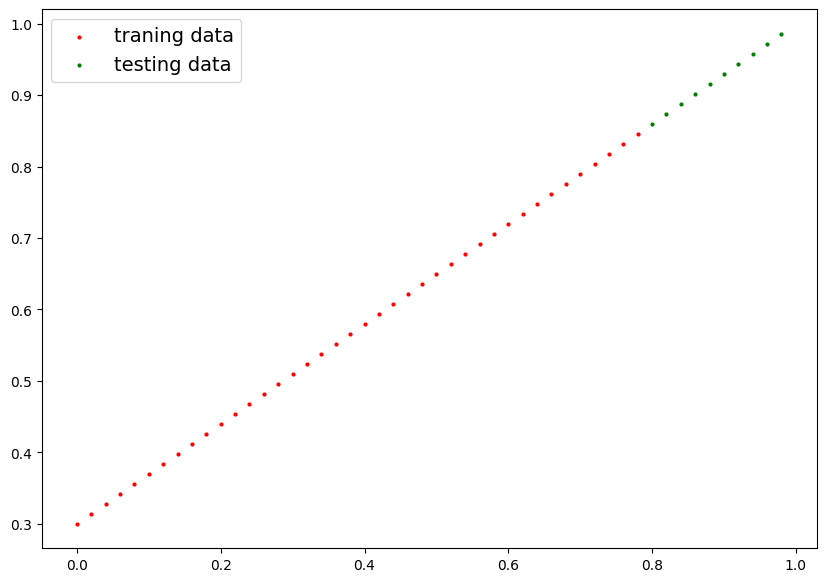

In [9]:
plot_predictions(X_train,y_train,X_test,y_test)

## Creating our first model in pytorch for linear regression

In [10]:
# Building our First PyTorch Model
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

  def forward(self,X:torch.Tensor)-> torch.Tensor:
    return self.weights * X + self.bias

## Checking the content of PyTorch Model(parameters())

In [11]:
# set the random seed first of all while using random functions
torch.manual_seed(42)

# create an instance of model
model_0 = LinearRegressionModel()

In [12]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [13]:
# List Named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making Predictions using torch.inference_mode()

In [14]:
# Make predictions using model_0
with torch.inference_mode(): # it turns out the Gradient Model Tracking mode off.
  y_preds = model_0(X_test)

In [15]:
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [16]:
y_test

tensor([0.8600, 0.8740, 0.8880, 0.9020, 0.9160, 0.9300, 0.9440, 0.9580, 0.9720,
        0.9860])

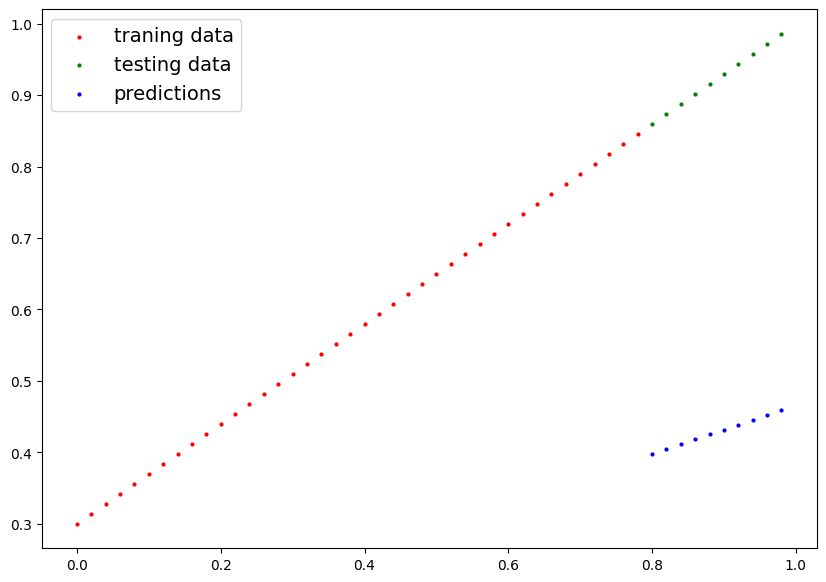

In [17]:
# lets visulize the output
plot_predictions(X_train,y_train,X_test,y_test,y_preds)

In [18]:
## we could make predictions using model_0 direct
y_preds_1 = model_0(X_test)
y_preds_1

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

### Train the Model

In [19]:
### Setup a Loss functions
loss_fn = nn.L1Loss()
loss_fn


### Setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.001)

In [20]:
torch.manual_seed(42)
epochs = 100

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []


# Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train()
  y_preds = model_0(X_train)
  loss = loss_fn(y_preds,y_train)
  print(f"Loss at {epoch} iteration: {loss}")
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval() #
  with torch.inference_mode():
    test_preds = model_0(X_test)
    test_loss = loss_fn(test_preds,y_test)
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Test Loss at {epoch} iteration, Test Loss: {test_loss} Loss:{loss}")
    print(model_0.state_dict())


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([40])) that is different to the input size (torch.Size([40, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Loss at 0 iteration: 0.31520015001296997
Test Loss at 0 iteration, Test Loss: 0.49330204725265503 Loss:0.31520015001296997
OrderedDict([('weights', tensor([0.3370])), ('bias', tensor([0.1297]))])
Loss at 1 iteration: 0.3142184913158417
Loss at 2 iteration: 0.3132368326187134
Loss at 3 iteration: 0.31225576996803284
Loss at 4 iteration: 0.3112791180610657
Loss at 5 iteration: 0.3103100061416626
Loss at 6 iteration: 0.30934733152389526
Loss at 7 iteration: 0.30838850140571594
Loss at 8 iteration: 0.3074296712875366
Loss at 9 iteration: 0.3064711093902588
Loss at 10 iteration: 0.3055168390274048
Test Loss at 10 iteration, Test Loss: 0.48106929659843445 Loss:0.3055168390274048
OrderedDict([('weights', tensor([0.3404])), ('bias', tensor([0.1390]))])
Loss at 11 iteration: 0.3045707046985626
Loss at 12 iteration: 0.30363237857818604
Loss at 13 iteration: 0.30269598960876465
Loss at 14 iteration: 0.30175960063934326
Loss at 15 iteration: 0.3008231818675995
Loss at 16 iteration: 0.2998887896537

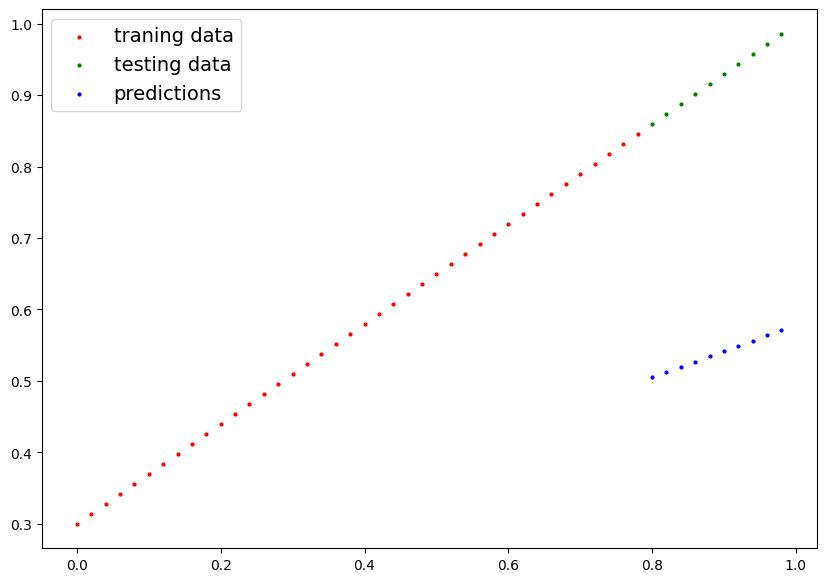

In [21]:
with torch.inference_mode():
  y_preds = model_0(X_test)
plot_predictions(X_train,y_train,X_test,y_test,y_preds)

In [22]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3655])), ('bias', tensor([0.2127]))])

In [23]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3655])), ('bias', tensor([0.2127]))])

In [24]:
type(loss_values)

list

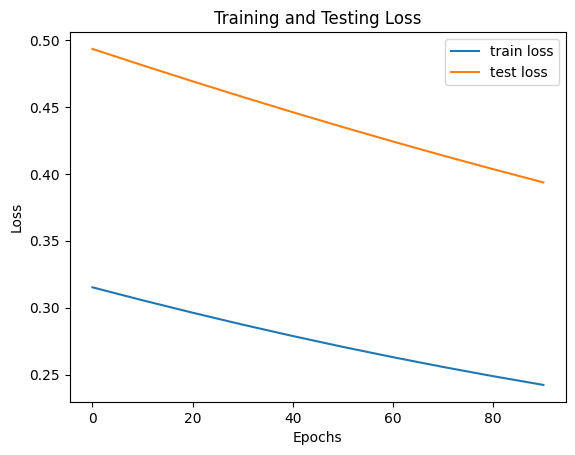

In [25]:
## Plot the Loss Count
plt.plot(epoch_count,torch.tensor(loss_values).cpu().numpy(),label="train loss")
plt.plot(epoch_count,torch.tensor(test_loss_values).cpu().numpy(),label="test loss")
plt.title("Training and Testing Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [26]:
## Saving our model for reuse
## Three main methods we can use to save pytorch model
## torch.save()  save pytorch object in python's pickle format
## torch.load allows you to load pytorch object
## torch.nn.Module.load_state_dict() this allows you to load model's saved state dictionary

from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# save the model
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

In [27]:
# checkout dictory
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Sep 12 11:03 01_pytorch_workflow_model_0.pth


In [28]:
# Since we load the state dict of our model rather than entire model, we will create new instance of model with same state_dict() parameters
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_0.state_dict()

<ipython-input-28-efa47fa4adf0>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


OrderedDict([('weights', tensor([0.3655])), ('bias', tensor([0.2127]))])

In [29]:
# make some predictions
loaded_model_0.eval()
with torch.inference_mode():
  y_preds = loaded_model_0(X_test)
print(y_preds.squeeze())

tensor([0.5051, 0.5124, 0.5197, 0.5271, 0.5344, 0.5417, 0.5490, 0.5563, 0.5636,
        0.5709])


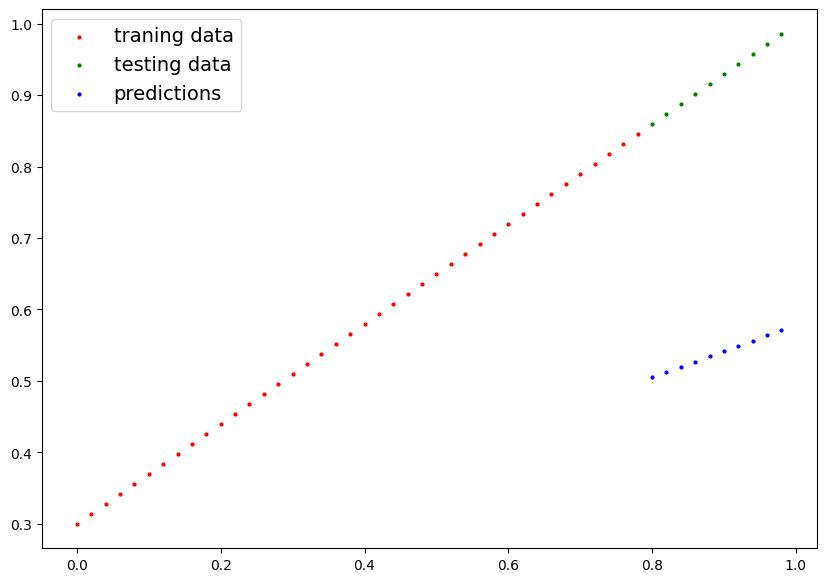

In [30]:
plot_predictions(X_train,y_train,X_test,y_test,y_preds)

## Put all together we have done so far

In [31]:
### Create Device-agnotic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [32]:
# create parameters with some random value of your choice
weight = 0.7
bias = 0.3

# create range values
start = 0
end = 1
step = 0.02

# create X and y (features and labels)
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = (weight * X) + bias

In [33]:
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [34]:
train_split = int(0.8*len(X))
test_split = int(0.2*len(X))
train_split,test_split

(40, 10)

In [35]:
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]
X_train.shape,X_test.shape,y_train.shape,y_test.shape

(torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]))

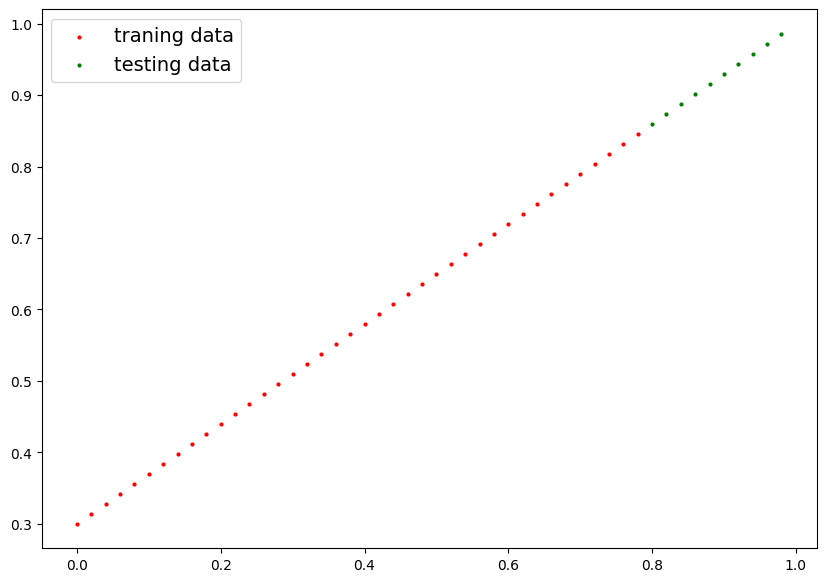

In [36]:
plot_predictions(X_train,y_train,X_test,y_test)

## Building a Pytorch Linear Model

In [37]:
## creating a linear model by subclassing nn.Module
## in the Past we created nn.Parameters by ourself manually but one step ahead when we create nn.linear (linear_layer) it by default have its own
## parameters so we don't need it.
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    ## Use nn.linear layer for creating model parameters
    ## it applies linear regression on our model / also called linear transformation,probing layer,fully connected layer,dense layer
    self.linear_layer = nn.Linear(in_features=1, # input of size 1
                                  out_features=1, # output of size 1
                                )

  def forward(self,x) -> torch.Tensor:
      return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1,model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [38]:
next(model_1.parameters()).device

device(type='cpu')

In [39]:
model_1.to('cpu')
next(model_1.parameters()).device

device(type='cpu')

In [40]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

## Training Code

In [41]:
## Setup the Loss Function
loss_fn = nn.L1Loss() # Same as MAE

optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.01)


In [42]:
len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

In [43]:
X_train.device,y_train.device,X_test.device,y_test.device

(device(type='cpu'),
 device(type='cpu'),
 device(type='cpu'),
 device(type='cpu'))

In [44]:
for param in model_1.parameters():
    print(param.device)


cpu
cpu


In [45]:
# Lets write a training loop
torch.manual_seed(42)
epochs = 200
X_train = X_train.to('cpu')
y_train = y_train.to('cpu')
X_test = X_test.to('cpu')
y_test = y_test.to('cpu')
for epoch in range(epochs):
  model_1.train()

  # forward pass
  y_preds = model_1(X_train)

  # Calculate the loss
  loss = loss_fn(y_preds,y_train)

  # zero the optimzer
  optimizer.zero_grad()

  #BackPropagation here
  loss.backward()

  # optimizer step
  optimizer.step() # it sets the model parameters

  # testing
  model_1.eval()
  with torch.inference_mode():
    test_preds = model_1(X_test)
    test_loss = loss_fn(test_preds,y_test)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

## Keep in mind we have put our model on gpu and tensor data is still on cpu which will cause error/confliction we have to put our tensor datat to gpu.



Epoch: 0 | Loss: 0.5551779866218567 | Test Loss: 0.5739762187004089
Epoch: 10 | Loss: 0.4399680495262146 | Test Loss: 0.4392663538455963
Epoch: 20 | Loss: 0.3247582018375397 | Test Loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954827964305878 | Test Loss: 0.16984674334526062
Epoch: 40 | Loss: 0.09433844685554504 | Test Loss: 0.03513689711689949
Epoch: 50 | Loss: 0.023886386305093765 | Test Loss: 0.04784906655550003
Epoch: 60 | Loss: 0.0199567973613739 | Test Loss: 0.04580312222242355
Epoch: 70 | Loss: 0.016517987474799156 | Test Loss: 0.0375305712223053
Epoch: 80 | Loss: 0.013089170679450035 | Test Loss: 0.029944902285933495
Epoch: 90 | Loss: 0.009653178043663502 | Test Loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215679459273815 | Test Loss: 0.014086711220443249
Epoch: 110 | Loss: 0.002787243574857712 | Test Loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 130 | Loss: 0.0012645035749301314 | Test Loss: 0.01380180753767

In [46]:
y_preds = model_1(X_train)
len(y_preds)

40

In [47]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

## Making and evaluating predictions

In [48]:
model_1.eval()
with torch.inference_mode():
  y_preds = model_1(X_test)

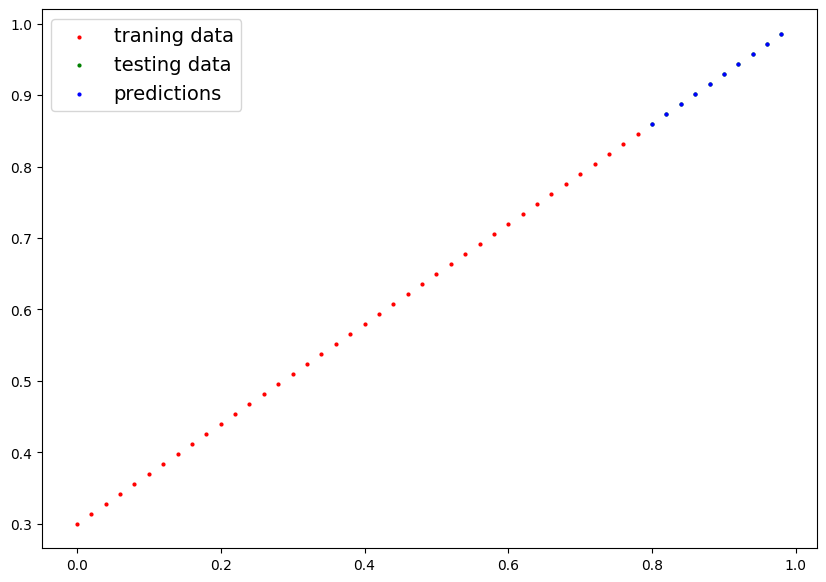

In [49]:
plot_predictions(X_train,y_train,X_test,y_test,y_preds)

## Saving and Loading Model

In [55]:
## Saving our model for reuse
## Three main methods we can use to save pytorch model
## torch.save()  save pytorch object in python's pickle format
## torch.load allows you to load pytorch object
## torch.nn.Module.load_state_dict() this allows you to load model's saved state dictionary

from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# save the model
torch.save(obj=model_1.state_dict(),f=MODEL_SAVE_PATH)

In [56]:
!ls -l models

total 8
-rw-r--r-- 1 root root 1680 Sep 12 11:14 01_pytorch_workflow_model_0.pth
-rw-r--r-- 1 root root 1744 Sep 12 11:16 01_pytorch_workflow_model_1.pth


In [57]:
# Since we load the state dict of our model rather than entire model, we will create new instance of model with same state_dict() parameters
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_1.state_dict()

<ipython-input-57-30240823194a>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

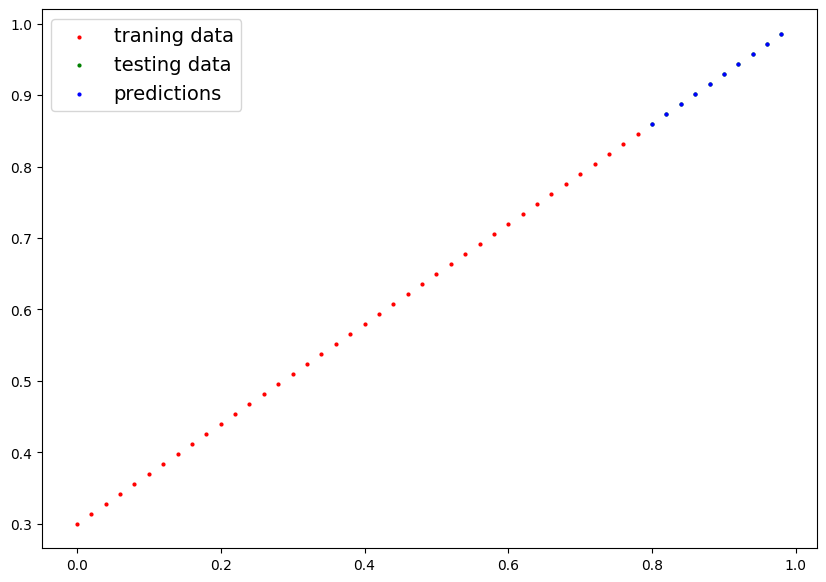

In [58]:
model_1.eval()
with torch.inference_mode():
  y_preds_new = loaded_model_1(X_test)
plot_predictions(X_train,y_train,X_test,y_test,y_preds_new)

In [59]:
y_preds_new == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])